In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 로드
file_path = './housing_sales_data.csv'
data = pd.read_csv(file_path)

In [3]:
# 데이터 타입 확인 및 필요 시 변환
# 날짜 열을 문자열로 변환 (문자열로 되어 있어야 날짜 형식으로 변환이 필요할 수 있음)
data['date'] = data['date'].astype(str)

In [4]:
# 숫자로 변환
def convert_to_numeric(value):
    if isinstance(value, str):
        return float(value.replace(',', '').replace('tendon', ''))
    return float(value)

In [5]:
data['total housing sales'] = data['total housing sales'].apply(convert_to_numeric)
data['apartment sales'] = data['apartment sales'].apply(convert_to_numeric)
data['total housing sales - apartment sales'] = data['total housing sales - apartment sales'].apply(convert_to_numeric)


In [6]:
# 상관행렬 계산
corr = data[['date', 'total housing sales', 'apartment sales', 'total housing sales - apartment sales']].corr(method='pearson')


KeyError: "None of [Index(['date', 'total housing sales', 'apartment sales',\n       'total housing sales - apartment sales'],\n      dtype='object')] are in the [columns]"

c:\Users\puppy.DESKTOP-7F9RCAG\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\puppy.DESKTOP-7F9RCAG\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\puppy.DESKTOP-7F9RCAG\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\puppy.DESKTOP-7F9RCAG\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\puppy.DESKTOP-7F9RCAG\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) mis

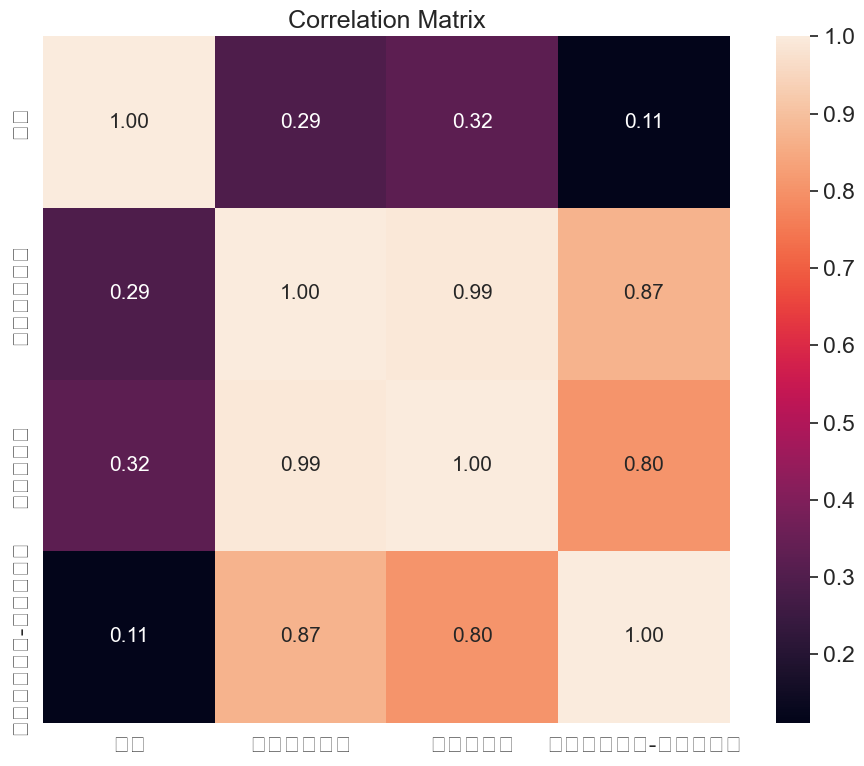

In [ ]:
# 상관행렬 히트맵 시각화
cols_view = ['date', 'total housing sales', 'apartment sales', 'total housing sales - apartment sales']
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 8))
hm = sns.heatmap(corr.values,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols_view,
                 xticklabels=cols_view)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

c:\Users\puppy.DESKTOP-7F9RCAG\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Arial.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\puppy.DESKTOP-7F9RCAG\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) Arial.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\puppy.DESKTOP-7F9RCAG\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) Arial.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\puppy.DESKTOP-7F9RCAG\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) Arial.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\puppy.DESKTOP-7F9RCAG\AppData\Local\Pr

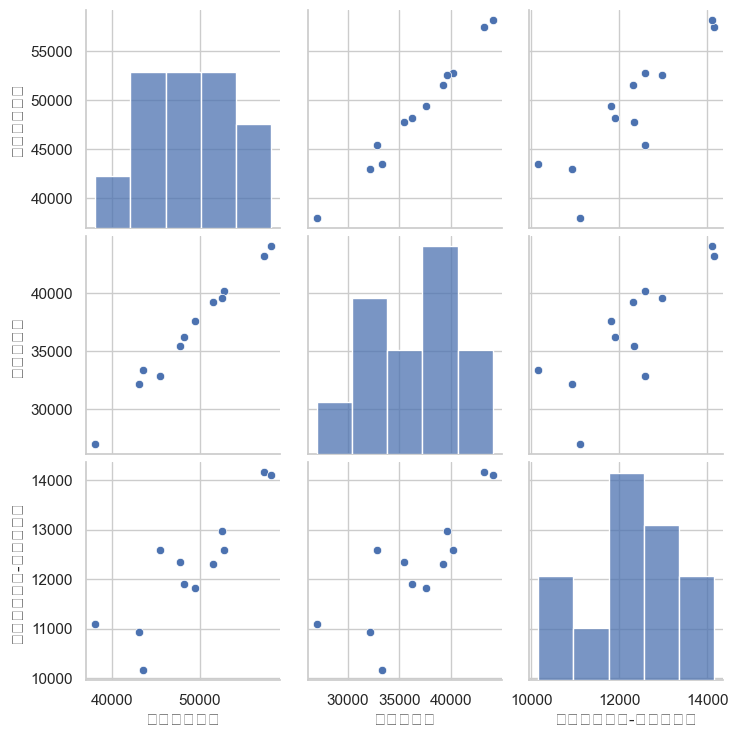

In [ ]:
# 쌍으로 그리기
sns.set(style='whitegrid', context='notebook')
sns.pairplot(data[['date', 'total housing sales', 'apartment sales', 'total housing sales - apartment sales']], height=2.5)
plt.show()

C:\Users\puppy.DESKTOP-7F9RCAG\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\puppy.DESKTOP-7F9RCAG\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


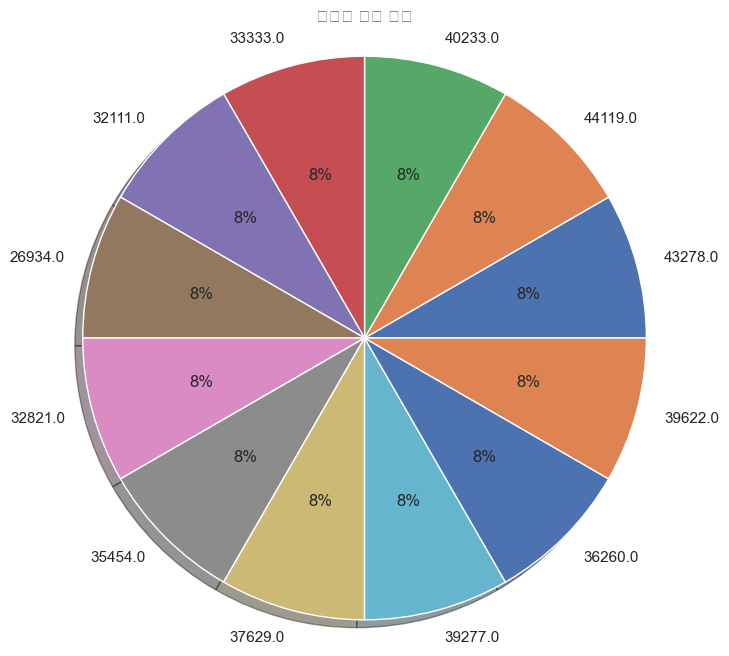

In [ ]:
# 아파트 매매 데이터 분포 시각화
labels = data['apartment sales'].value_counts().index.tolist()
fracs1 = data['apartment sales'].value_counts().values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(fracs1, labels=labels, autopct='%.0f%%', shadow=True)
plt.title("apartment sales breakdown")
plt.axis('equal')  
plt.show()

C:\Users\puppy.DESKTOP-7F9RCAG\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\puppy.DESKTOP-7F9RCAG\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


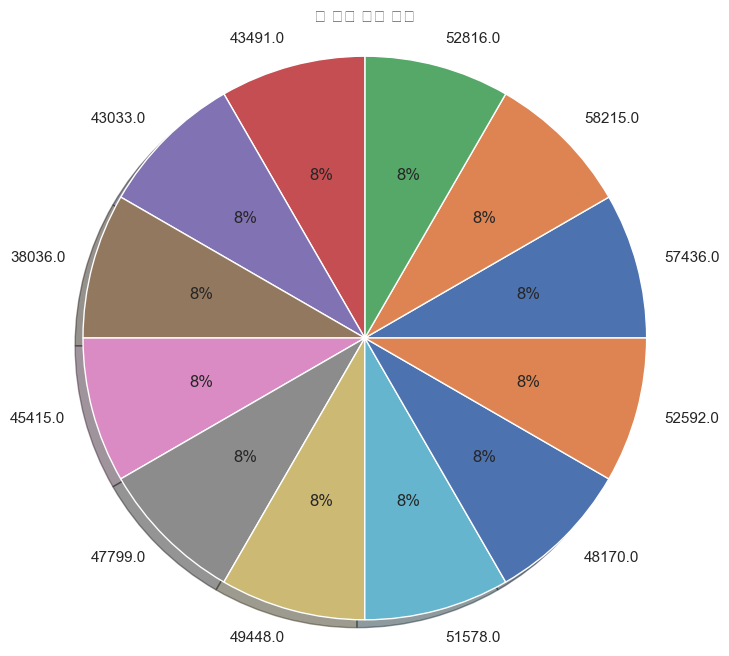

In [ ]:
# 주택 매매 데이터 분포 시각화 (예시로 pie chart 작성)
labels = data['total housing sales'].value_counts().index.tolist()
fracs1 = data['total housing sales'].value_counts().values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(fracs1, labels=labels, autopct='%.0f%%', shadow=True)
plt.title("overall housing sales breakdown")
plt.axis('equal')  
plt.show()